In [5]:
import torch 
import torch.nn as nn
preds1 = torch.randn(3, 4)
trues1 = torch.randn(3, 4)

In [8]:
loss1_1 = nn.MSELoss()(preds1, trues1)
loss1_2 = nn.MSELoss()(preds1, trues1)

loss1_1.item(), loss1_2

(1.5776878595352173, tensor(1.5777))

In [10]:
import numpy as np
X = np.c_[np.array([1,2,3,4,5]), np.array([6,7,8,9,10])]
num_features = X.shape[1]
# num_periods = len(data)

In [11]:
num_features

2

In [23]:
import pandas as pd
df = pd.read_csv(r"C:\Users\82104\Documents\reach_data222.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Date                                        22065 non-null  object 
 1   Store Number                                22065 non-null  int64  
 2   Item number                                 22065 non-null  int64  
 3   Sales amount                                22065 non-null  float64
 4   Sale quantity                               22065 non-null  float64
 5   Total promotion based date,store and items  22065 non-null  float64
 6   Promotionflag                               22065 non-null  int64  
 7   Waste quantity                              22065 non-null  float64
 8   Inventory quantity                          22065 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
df['Sale quantity'].astype('float32')

ValueError: could not convert string to float: '********  '

In [22]:
df[df['Sale quantity'] == '********  ']

,Date,Store Number,Item number,Sales amount,Sale quantity,"Total promotion based date,store and items",Promotionflag,Waste quantity,Inventory quantity
11135,2018-01-14,0,283329,1148.51,********,2612.15,1,43.0,-999.000
15708,2018-05-19,0,33288729,1963.26,********,7120.45,1,24.0,832.437


In [26]:
import sys
int(sys.argv[1])

ValueError: invalid literal for int() with base 10: '--ip=127.0.0.1'

In [20]:
import pandas as pd

df1 = pd.read_csv(r'C:\Users\82104\Documents\daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df1

C:\Users\82104\AppData\Local\Temp\ipykernel_13892\1020066061.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(r'C:\Users\82104\Documents\daily-min-temperatures.csv', header=0, index_col=0, squeeze=True)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [56]:
amplitude = scaler.fit_transform(df1.to_numpy().reshape(-1, 1)).reshape(-1)
amplitude

array([ 0.57414449,  0.36121673,  0.42965779, ...,  0.02661597,
        0.19391635, -0.01140684])

In [43]:
import numpy as np
np.random.seed(0)
time        = np.arange(0, 400, 0.1)    
amplitude   = np.sin(time) + np.sin(time * 0.05) + \
                  np.sin(time * 0.12) * np.random.normal(-0.2, 0.2, len(time))
df2 = pd.DataFrame({'time':time, 'amplitude':amplitude}).set_index('time').squeeze('columns')
df2

time
0.0      0.000000
0.1      0.103394
0.2      0.208567
0.3      0.319452
0.4      0.417742
           ...   
399.5    0.626660
399.6    0.210560
399.7    0.402540
399.8    0.092350
399.9    0.392401
Name: amplitude, Length: 4000, dtype: float64

In [53]:
def create_inout_sequences(input_data, input_window ,output_window):
    inout_seq = []
    L = len(input_data)
    block_num =  L - 101 + 1
    # total of [N - block_len + 1] blocks
    # where block_len = input_window + output_window

    for i in range( block_num ):
        train_seq = input_data[i : i + input_window]
        train_label = input_data[i + output_window : i + input_window + output_window]
        inout_seq.append((train_seq ,train_label))

    return torch.FloatTensor(np.array(inout_seq))

In [44]:
from sklearn.preprocessing import MinMaxScaler
    
#loading weather data from a file
#from pandas import read_csv
#series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# looks like normalizing input values curtial for the model
scaler = MinMaxScaler(feature_range=(-1, 1)) 
#amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)

samples = int(len(time) * 0.8) # use a parameter to control training size
train_data = amplitude[:samples]
test_data = amplitude[samples:]

In [45]:
(train_data)

array([ 0.01401334,  0.05531073,  0.09731888, ..., -0.41866794,
       -0.37994422, -0.4006821 ])

In [46]:
(test_data)

array([-0.3921998 , -0.27004541, -0.32719065, -0.35532975, -0.22541752,
       -0.12437945, -0.1205621 ,  0.00252287, -0.0230299 , -0.04371589,
        0.00723052, -0.02172744,  0.15587324,  0.03271044,  0.08204022,
        0.14714623,  0.17254147,  0.08973356,  0.13465694,  0.21308927,
        0.26916429,  0.21509157,  0.18283897,  0.06935397,  0.11603744,
        0.17307281,  0.18850242,  0.14990513,  0.06954567,  0.1115304 ,
        0.19456801, -0.08464368, -0.13534266, -0.01345999, -0.14561385,
       -0.19614822, -0.21793502, -0.33594982, -0.40555989, -0.42768054,
       -0.31789928, -0.55441157, -0.44634937, -0.5588159 , -0.57446613,
       -0.51964527, -0.5364931 , -0.5957427 , -0.78281641, -0.53303424,
       -0.56279666, -0.66274433, -0.67114748, -0.53008677, -0.59042864,
       -0.65680835, -0.66392332, -0.63910806, -0.51074971, -0.49763427,
       -0.68036996, -0.48680222, -0.42336818, -0.5776771 , -0.42295007,
       -0.52740325, -0.33810216, -0.47634818, -0.32643259, -0.28

In [48]:
import torch
import torch.nn as nn
train_tensor = torch.FloatTensor(train_data).view(-1)

In [92]:
train_tensor

tensor([ 0.0140,  0.0553,  0.0973,  ..., -0.4187, -0.3799, -0.4007])

In [54]:
train_sequence = create_inout_sequences(train_data, 100 ,1)

In [55]:
train_sequence

tensor([[[ 0.0140,  0.0553,  0.0973,  ...,  0.1493, -0.0088, -0.0233],
         [ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540]],

        [[ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540],
         [ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180]],

        [[ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180],
         [ 0.1416,  0.1809,  0.2060,  ...,  0.0540, -0.2180, -0.2411]],

        ...,

        [[ 0.5458,  0.5033,  0.5309,  ..., -0.5391, -0.4198, -0.4650],
         [ 0.5033,  0.5309,  0.4319,  ..., -0.4198, -0.4650, -0.4187]],

        [[ 0.5033,  0.5309,  0.4319,  ..., -0.4198, -0.4650, -0.4187],
         [ 0.5309,  0.4319,  0.4594,  ..., -0.4650, -0.4187, -0.3799]],

        [[ 0.5309,  0.4319,  0.4594,  ..., -0.4650, -0.4187, -0.3799],
         [ 0.4319,  0.4594,  0.4238,  ..., -0.4187, -0.3799, -0.4007]]])

In [57]:
from torch.utils.data import DataLoader

DataLoader(train_sequence)

In [58]:
iter(DataLoader(train_sequence))

In [190]:
train_sequence[1550:]

tensor([[[ 0.0763,  0.0629,  0.0375,  ...,  0.7343,  0.7291,  0.7929],
         [ 0.0629,  0.0375,  0.0281,  ...,  0.7291,  0.7929,  0.7805]],

        [[ 0.0629,  0.0375,  0.0281,  ...,  0.7291,  0.7929,  0.7805],
         [ 0.0375,  0.0281,  0.0276,  ...,  0.7929,  0.7805,  0.6979]],

        [[ 0.0375,  0.0281,  0.0276,  ...,  0.7929,  0.7805,  0.6979],
         [ 0.0281,  0.0276,  0.0045,  ...,  0.7805,  0.6979,  0.5889]],

        ...,

        [[ 0.5458,  0.5033,  0.5309,  ..., -0.5391, -0.4198, -0.4650],
         [ 0.5033,  0.5309,  0.4319,  ..., -0.4198, -0.4650, -0.4187]],

        [[ 0.5033,  0.5309,  0.4319,  ..., -0.4198, -0.4650, -0.4187],
         [ 0.5309,  0.4319,  0.4594,  ..., -0.4650, -0.4187, -0.3799]],

        [[ 0.5309,  0.4319,  0.4594,  ..., -0.4650, -0.4187, -0.3799],
         [ 0.4319,  0.4594,  0.4238,  ..., -0.4187, -0.3799, -0.4007]]])

In [85]:
train_sequence.size()

torch.Size([3100, 2, 100])

In [90]:
train_sequence[1550:].size()

torch.Size([1550, 2, 100])

In [67]:
(train_sequence//2).size()

torch.Size([3100, 2, 100])

In [194]:
train_sequence.chunk(2, dim=0)

(tensor([[[ 0.0140,  0.0553,  0.0973,  ...,  0.1493, -0.0088, -0.0233],
          [ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540]],
 
         [[ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540],
          [ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180]],
 
         [[ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180],
          [ 0.1416,  0.1809,  0.2060,  ...,  0.0540, -0.2180, -0.2411]],
 
         ...,
 
         [[ 0.1593,  0.1385,  0.0803,  ...,  0.6942,  0.8069,  0.6092],
          [ 0.1385,  0.0803,  0.0763,  ...,  0.8069,  0.6092,  0.7343]],
 
         [[ 0.1385,  0.0803,  0.0763,  ...,  0.8069,  0.6092,  0.7343],
          [ 0.0803,  0.0763,  0.0629,  ...,  0.6092,  0.7343,  0.7291]],
 
         [[ 0.0803,  0.0763,  0.0629,  ...,  0.6092,  0.7343,  0.7291],
          [ 0.0763,  0.0629,  0.0375,  ...,  0.7343,  0.7291,  0.7929]]]),
 tensor([[[ 0.0763,  0.0629,  0.0375,  ...,  0.7343,  0.7291,  0.7929],
          [ 0.0629,  0.0375,  

In [198]:
a=[]
for dataset in train_sequence.chunk(2, dim=0):
    print(dataset)
    a.append(DataLoader(dataset, #batch_size = 100, 
                                    #shuffle = True
                                    ))


tensor([[[ 0.0140,  0.0553,  0.0973,  ...,  0.1493, -0.0088, -0.0233],
         [ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540]],

        [[ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540],
         [ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180]],

        [[ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180],
         [ 0.1416,  0.1809,  0.2060,  ...,  0.0540, -0.2180, -0.2411]],

        ...,

        [[ 0.1593,  0.1385,  0.0803,  ...,  0.6942,  0.8069,  0.6092],
         [ 0.1385,  0.0803,  0.0763,  ...,  0.8069,  0.6092,  0.7343]],

        [[ 0.1385,  0.0803,  0.0763,  ...,  0.8069,  0.6092,  0.7343],
         [ 0.0803,  0.0763,  0.0629,  ...,  0.6092,  0.7343,  0.7291]],

        [[ 0.0803,  0.0763,  0.0629,  ...,  0.6092,  0.7343,  0.7291],
         [ 0.0763,  0.0629,  0.0375,  ...,  0.7343,  0.7291,  0.7929]]])
tensor([[[ 0.0763,  0.0629,  0.0375,  ...,  0.7343,  0.7291,  0.7929],
         [ 0.0629,  0.0375,  0.0281,  ...,  0.7291,

In [222]:
len(a[0])

1550

In [111]:
(a[0])

In [218]:
for batch in a[0]:  # loop thru data
    batch

In [219]:
batch

tensor([[[ 0.0803,  0.0763,  0.0629,  0.0375,  0.0281,  0.0276,  0.0045,
           0.0295,  0.0298,  0.0501,  0.0531,  0.0546,  0.0967,  0.1232,
           0.1324,  0.1696,  0.1995,  0.2338,  0.2687,  0.3036,  0.3452,
           0.3832,  0.4214,  0.4584,  0.4957,  0.5418,  0.5754,  0.6069,
           0.6468,  0.6626,  0.6949,  0.7276,  0.7523,  0.7672,  0.7466,
           0.7747,  0.8002,  0.7915,  0.8348,  0.8057,  0.7912,  0.7482,
           0.7513,  0.7365,  0.7317,  0.7005,  0.6750,  0.5970,  0.6191,
           0.5121,  0.4948,  0.4812,  0.4246,  0.3584,  0.3220,  0.2579,
           0.2828,  0.2681,  0.1859,  0.1398,  0.0680,  0.1221,  0.1427,
          -0.0325, -0.0274, -0.0315, -0.0420, -0.0207,  0.0309,  0.0033,
          -0.0158, -0.0661, -0.0757, -0.0490,  0.0766,  0.0210,  0.0254,
           0.0642,  0.1432,  0.0670,  0.2396,  0.2104,  0.2275,  0.3003,
           0.3268,  0.3346,  0.3780,  0.3810,  0.5043,  0.4719,  0.4807,
           0.5782,  0.6772,  0.6219,  0.6117,  0.69

In [98]:
a1

tensor([[[ 0.0140,  0.0553,  0.0973,  ...,  0.1493, -0.0088, -0.0233],
         [ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540]],

        [[ 0.0553,  0.0973,  0.1416,  ..., -0.0088, -0.0233,  0.0540],
         [ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180]],

        [[ 0.0973,  0.1416,  0.1809,  ..., -0.0233,  0.0540, -0.2180],
         [ 0.1416,  0.1809,  0.2060,  ...,  0.0540, -0.2180, -0.2411]],

        ...,

        [[ 0.1593,  0.1385,  0.0803,  ...,  0.6942,  0.8069,  0.6092],
         [ 0.1385,  0.0803,  0.0763,  ...,  0.8069,  0.6092,  0.7343]],

        [[ 0.1385,  0.0803,  0.0763,  ...,  0.8069,  0.6092,  0.7343],
         [ 0.0803,  0.0763,  0.0629,  ...,  0.6092,  0.7343,  0.7291]],

        [[ 0.0803,  0.0763,  0.0629,  ...,  0.6092,  0.7343,  0.7291],
         [ 0.0763,  0.0629,  0.0375,  ...,  0.7343,  0.7291,  0.7929]]])

In [99]:
a2

tensor([[[ 0.0763,  0.0629,  0.0375,  ...,  0.7343,  0.7291,  0.7929],
         [ 0.0629,  0.0375,  0.0281,  ...,  0.7291,  0.7929,  0.7805]],

        [[ 0.0629,  0.0375,  0.0281,  ...,  0.7291,  0.7929,  0.7805],
         [ 0.0375,  0.0281,  0.0276,  ...,  0.7929,  0.7805,  0.6979]],

        [[ 0.0375,  0.0281,  0.0276,  ...,  0.7929,  0.7805,  0.6979],
         [ 0.0281,  0.0276,  0.0045,  ...,  0.7805,  0.6979,  0.5889]],

        ...,

        [[ 0.5458,  0.5033,  0.5309,  ..., -0.5391, -0.4198, -0.4650],
         [ 0.5033,  0.5309,  0.4319,  ..., -0.4198, -0.4650, -0.4187]],

        [[ 0.5033,  0.5309,  0.4319,  ..., -0.4198, -0.4650, -0.4187],
         [ 0.5309,  0.4319,  0.4594,  ..., -0.4650, -0.4187, -0.3799]],

        [[ 0.5309,  0.4319,  0.4594,  ..., -0.4650, -0.4187, -0.3799],
         [ 0.4319,  0.4594,  0.4238,  ..., -0.4187, -0.3799, -0.4007]]])

In [210]:
b = DataLoader(torch.FloatTensor([[[ 0.0140,  0.0553,  0.0973,  0.1493, -0.0088, -0.0233],
        [ 0.0553,  0.0973,  0.1416, -0.0088, -0.0233,  0.0540]],
        [[ 0.0553,  0.0973,  0.1416, -0.0088, -0.0233,  0.0540],
        [ 0.0973,  0.1416,  0.1809, -0.0233,  0.0540, -0.2180]]]))

In [220]:
for num, batch in enumerate(b):  # loop thru data
    
    if num == 0:
        A = batch
    else:
        A = torch.cat([A, batch])

#lets make a 6x6 matrix by append
A = tf.concat([matrix2], 0) #Now A is a 2 x 6 tensor
A = tf.concat([A, matrix1], 0) #Now A is a 4 x 6 tensor - append matrix1
A = tf.concat([A, matrix1], 0) #Now A is a 6 x 6 tensor - append matrix1

In [214]:
batch

{tensor([ 0.0553,  0.0973,  0.1416, -0.0088, -0.0233,  0.0540]): tensor([ 0.0973,  0.1416,  0.1809, -0.0233,  0.0540, -0.2180])}

In [221]:
A

tensor([[[ 0.0140,  0.0553,  0.0973,  0.1493, -0.0088, -0.0233],
         [ 0.0553,  0.0973,  0.1416, -0.0088, -0.0233,  0.0540]],

        [[ 0.0553,  0.0973,  0.1416, -0.0088, -0.0233,  0.0540],
         [ 0.0973,  0.1416,  0.1809, -0.0233,  0.0540, -0.2180]]])

In [11]:
import pandas as pd
series = pd.read_csv(r'C:\Users\82104\Documents\daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
len(series)

3650

In [6]:
import torch
import torch.nn as nn

# 입력 텐서의 크기가 10이고 출력 텐서의 크기가 20인 선형 변환을 수행하는 nn.Linear 모듈 생성
linear = nn.Linear(10, 20)

# 입력 텐서 생성 (크기가 10인 벡터)
input_tensor = torch.randn(1, 10)
input_tensor


tensor([[-0.7454, -0.1944,  1.1159, -1.5265, -0.2321, -0.2974, -0.1924,  0.9021,
          1.6684, -0.6377]])

In [8]:

# 선형 변환 수행 (입력 텐서를 출력 텐서로 변환)
output_tensor = linear(input_tensor)
output_tensor

tensor([[ 0.6153, -1.5472, -0.5036, -0.5673, -0.2460,  0.0492,  0.2819, -0.1660,
         -0.1947,  0.0547, -0.3895, -0.0928,  1.2441, -0.5287,  0.0658,  0.1882,
          0.5846, -0.5469, -0.2910,  0.0076]], grad_fn=<AddmmBackward0>)

In [9]:
val_loss = 1012310/10
val_loss.item()

AttributeError: 'float' object has no attribute 'item'

In [14]:
df = df[df['TE'] == sfdfsdafsdafsd]

,Temp
Date,
1981-01-10,20.0
1986-03-07,20.0
1990-02-22,20.0


In [16]:
series[1:3].values

array([[17.9],
       [18.8]])

In [5]:
import pandas as pd
import time
import numpy as np
import datetime

df = pd.read_excel('reach_data22.xlsx')
data = df.copy()
data.drop(data[data['Inventory quantity'] == '********  '].index, inplace=True)
data.drop(data[data['Sale quantity'] == '********  '].index, inplace=True)
data.drop(['Item name'], axis=1, inplace=True)



In [6]:
data.head(3)

,Date,Store Number,Item number,Sales amount,Sale quantity,Unit of sale,"Total promotion based date,store and items",Promotionflag,Waste quantity,Inventory quantity
0,2017-10-27,3853,40270013,37.64,11.447,KG,182.54,0,0.0,44.629
1,2017-01-12,3349,10270350,41.93,7,AD,53.81,0,0.0,35
2,2017-08-23,607,33287429,11.95,2.5,AD,457.50,0,62.0,13


In [10]:
data2 = data.loc[data['Item number'] == 20280029, ['Date', 'Store Number', 'Inventory quantity']].reset_index(drop=True)
data2

,Date,Store Number,Inventory quantity
0,2017-01-02,3853,12.095
1,2017-08-16,3853,26.501
2,2017-09-17,3349,19.793
3,2017-02-02,3349,11.695
4,2017-05-29,3349,25.434
...,...,...,...
1952,2018-08-26,607,102.889
1953,2018-03-14,607,-23.831
1954,2018-07-23,607,110.04
1955,2018-03-23,3853,14.622


In [ ]:
data2['month'] = np.array(data2['Date'].dt.month) #월
data2['day'] = np.array(data2['Date'].dt.day) #일
data2['dayofweek'] = data2['Date'].dt.dayofweek #요일 (월 = 0)

In [69]:
import pandas as pd
import time
import numpy as np
import datetime
import matplotlib.pyplot as plt
# from icecream import ic

# encoding the timestamp data cyclically. See Medium Article.
def process_data(source):

    df = pd.read_excel(source)
    
    df.drop(df[df['Inventory quantity'] == '********  '].index, inplace=True)
    df.drop(df[df['Sale quantity'] == '********  '].index, inplace=True)
    df = df.loc[df['Item number'] == 20280029, ['Date', 'Store Number', 'Inventory quantity']].reset_index(drop=True)
        
    day = np.array(df['Date'].dt.day)
    month = np.array(df['Date'].dt.month)

    days_in_month = 30
    month_in_year = 12


    df['sin_day'] = np.sin(2*np.pi*day/days_in_month)
    df['cos_day'] = np.cos(2*np.pi*day/days_in_month)
    df['sin_month'] = np.sin(2*np.pi*month/month_in_year)
    df['cos_month'] = np.cos(2*np.pi*month/month_in_year)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
        
    df.plot.scatter('sin_day','cos_day', ax=axes[0]).set_aspect('equal')
    df.plot.scatter('sin_month','cos_month', ax=axes[1]).set_aspect('equal')

    return df

train_dataset = process_data('Data/reach_data22.xlsx')
train_dataset.to_csv(r'Data/reach_dataset.csv', index=False)


In [71]:
pd.read_csv('Data/reach_dataset.csv')

,Date,Store Number,Inventory quantity,sin_day,cos_day,sin_month,cos_month
0,2017-01-02,3853,12.095,0.406737,0.913545,0.500000,8.660254e-01
1,2017-08-16,3853,26.501,-0.207912,-0.978148,-0.866025,-5.000000e-01
2,2017-09-17,3349,19.793,-0.406737,-0.913545,-1.000000,-1.836970e-16
3,2017-02-02,3349,11.695,0.406737,0.913545,0.866025,5.000000e-01
4,2017-05-29,3349,25.434,-0.207912,0.978148,0.500000,-8.660254e-01
...,...,...,...,...,...,...,...
1952,2018-08-26,607,102.889,-0.743145,0.669131,-0.866025,-5.000000e-01
1953,2018-03-14,607,-23.831,0.207912,-0.978148,1.000000,6.123234e-17
1954,2018-07-23,607,110.040,-0.994522,0.104528,-0.500000,-8.660254e-01
1955,2018-03-23,3853,14.622,-0.994522,0.104528,1.000000,6.123234e-17


c:\Users\82104\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


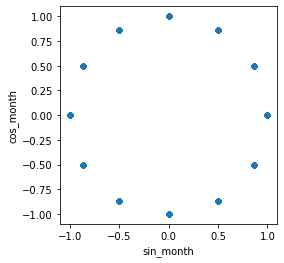

In [57]:
train_dataset.plot.scatter('sin_month','cos_month').set_aspect('equal')


In [133]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import os
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from joblib import dump

class SensorDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, df, root_dir, training_length, forecast_window):
        """
        Args:
            csv_file (string): Path to the csv file.
            root_dir (string): Directory
        """
        
        # load raw data file
        # csv_file = os.path.join(root_dir, csv_name)
        # self.df = pd.read_csv(csv_file)
        self.df = df
        self.root_dir = root_dir
        self.transform = MinMaxScaler()
        self.T = training_length
        self.S = forecast_window

    def __len__(self):
        # return number of client
        return len(self.df.groupby(by=["Store Number"]))

    # Will pull an index between 0 and __len__. 
    def __getitem__(self, idx):
        
        # Sensors are indexed from 1
        idx = idx

        # np.random.seed(0)

        start = np.random.randint(0, len(self.df) - self.T - self.S) 
        sensor_number = str(self.df[["Store Number"]][start:start+1].values.item())
        index_in = torch.tensor([i for i in range(start, start+self.T)])
        index_tar = torch.tensor([i for i in range(start + self.T, start + self.T + self.S)])
        _input = torch.tensor(self.df[["Inventory quantity", "sin_day", "cos_day", "sin_month", "cos_month"]][start : start + self.T].values)
        target = torch.tensor(self.df[["Inventory quantity", "sin_day", "cos_day", "sin_month", "cos_month"]][start + self.T : start + self.T + self.S].values)


        # # Sensors are indexed from 1  
        # idx = idx+1

        # # np.random.seed(0)

        # start = np.random.randint(0, len(self.df[self.df["reindexed_id"]==idx]) - self.T - self.S) 
        # sensor_number = str(self.df[self.df["reindexed_id"]==idx][["sensor_id"]][start:start+1].values.item())
        # index_in = torch.tensor([i for i in range(start, start+self.T)])
        # index_tar = torch.tensor([i for i in range(start + self.T, start + self.T + self.S)])
        # _input = torch.tensor(self.df[self.df["reindexed_id"]==idx][["humidity", "sin_hour", "cos_hour", "sin_day", "cos_day", "sin_month", "cos_month"]][start : start + self.T].values)
        # target = torch.tensor(self.df[self.df["reindexed_id"]==idx][["humidity", "sin_hour", "cos_hour", "sin_day", "cos_day", "sin_month", "cos_month"]][start + self.T : start + self.T + self.S].values)



        # scalar is fit only to the input, to avoid the scaled values "leaking" information about the target range.
        # scalar is fit only for humidity, as the timestamps are already scaled
        # scalar input/output of shape: [n_samples, n_features].
        scaler = self.transform

        scaler.fit(_input[:,0].unsqueeze(-1))
        _input[:,0] = torch.tensor(scaler.transform(_input[:,0].unsqueeze(-1)).squeeze(-1))
        target[:,0] = torch.tensor(scaler.transform(target[:,0].unsqueeze(-1)).squeeze(-1))

        # save the scalar to be used later when inverse translating the data for plotting.
        dump(scaler, 'scalar_item.joblib')

        return index_in, index_tar, _input, target, sensor_number

In [134]:
def load_partition(cid, csv_name, root_dir, training_length, forecast_window):
    csv_file = os.path.join(root_dir, csv_name)
    df = pd.read_csv(csv_file)
    
    df = df[df['Store Number'] == cid]
    print(df)
    
    data_dataset = SensorDataset(df = df, root_dir = root_dir, training_length = training_length, forecast_window = forecast_window)
    
    return data_dataset

In [135]:
train_dataset = load_partition(3853, r"reach_dataset.csv", "Data/", 48, 24)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

            Date  Store Number  Inventory quantity   sin_day   cos_day  \
0     2017-01-02          3853              12.095  0.406737  0.913545   
1     2017-08-16          3853              26.501 -0.207912 -0.978148   
5     2017-11-29          3853              14.130 -0.207912  0.978148   
9     2017-01-27          3853               7.830 -0.587785  0.809017   
17    2017-08-17          3853              22.551 -0.406737 -0.913545   
...          ...           ...                 ...       ...       ...   
1928  2018-04-08          3853              15.783  0.994522 -0.104528   
1942  2018-06-24          3853              16.305 -0.951057  0.309017   
1944  2018-12-09          3853              11.996  0.951057 -0.309017   
1946  2018-05-10          3853              -3.746  0.866025 -0.500000   
1955  2018-03-23          3853              14.622 -0.994522  0.104528   

         sin_month     cos_month  
0     5.000000e-01  8.660254e-01  
1    -8.660254e-01 -5.000000e-01  
5    -

In [86]:
dd = pd.read_csv('Data/train_raw.csv')
dd[dd['sensor_id'] == 1]

,sensor_id,timestamp,humidity,reindexed_id
0,1,2020-09-09 15:00:00+00:00,73.0,1
1,1,2020-09-09 16:00:00+00:00,74.0,1
2,1,2020-09-09 17:00:00+00:00,72.0,1
3,1,2020-09-09 18:00:00+00:00,70.0,1
4,1,2020-09-09 19:00:00+00:00,68.0,1
...,...,...,...,...
295,1,2020-09-21 22:00:00+00:00,65.0,1
296,1,2020-09-21 23:00:00+00:00,65.0,1
297,1,2020-09-22 00:00:00+00:00,65.0,1
298,1,2020-09-22 01:00:00+00:00,65.0,1


In [136]:
for index_in, index_tar, _input, target, sensor_number in train_dataloader:
    print('index_in : ', index_in)
    print('index_tar: ', index_tar)
    print('input: ', _input)
    print('target: ', target)
    print('sensor_number: ', sensor_number)
    

KeyError: "['humidity'] not in index"

In [126]:
iter(train_dataloader)

In [129]:
count = 0 
for index_in, index_tar, _input, target, sensor_number in train_dataset:
    count += 1
print(count)
    

KeyboardInterrupt: 